# Итоговый проект. Банки - Анализ оттока клиентов

**Цель исследования**: составить портрет пользователя, определить какие показатели влияют на отток клиентов банка

План работы:
1. [Изучение общей информации](#start)
    - загрузить датасет, просмотреть общую информацию, сделать заключение о корректности типов данных, наличии/отсутствии пропусков
2. [Предобработка данных](#pre_processing)
    - откорректировать названия столбцов, типы данных, проработать пропуски и дубликаты, сделать предположения почему они могли появиться
3. [Исследовательский анализ данных](#research_analysis)
    - выделить группы признаков бинарные, категориальные, количественные
    - посмотреть данные на предмет выбросов
    - сгруппировать данные по клиентам в зависимости от наличия факта оттока, и поcчитать среднее, моду, медиану по всем признакам в данных группах
    - по количественным признакам изучить гистограммы
    - по бинарным и категориальным построить столбчатые графики
    - описать портреты пользователей ушедших в отток/оставшихся, описать их признаки
    - выделить клиентов склонных к оттоку
4. [Проверка гипотез](#hipotesys)
    - Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
    - Проверить гипотезу различия возраста групп клиентов, которые ушли и теми, которые остались
    - Проверить гипотезу о различии скорингового рейтинга по клиентам, которые ушли и теми, которые остались
5. [Выводы по портрету клиентов и рекомендации по удержанию клиентов разных групп](#resume)

In [2]:
import pandas as pd # <импорт библиотеки pandas>

import matplotlib.pylab as plt # <импорт библиотеки matplotlib>
import numpy as np # <импорт библиотеки numpy>
import seaborn as sns #<импорт библиотеки seaborn>
import scipy.stats as st  # <импорт scipy.stats>
from IPython.display import display# <импорт метода display из библиотеки IPython.display для просмотра таблиц>
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import pylab as pl
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import re
from datetime import datetime, date, time
import math as mth
from pandas.plotting import register_matplotlib_converters


Датасет содержит следующую информацию:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

Данные содержатся в csv файле /datasets/bank_dataset.csv

## 1. Изучение общей информации <a id="start"> </a>

Прочитаем файл bank_dataset.csv

In [3]:
try:
    path = 'E:/csv_diplom/'#<сохраним путь к файлу в переменной path>
except:
    path = '/datasets/'#<сохраним путь к файлу в переменной path>

In [4]:
bank_dataset = pd.read_csv(path + 'bank_dataset.csv')

Посмотрим таблицу bank_dataset, выведем ее на экран

In [5]:
display(bank_dataset)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


Посмотрим общую информацию о таблице

In [6]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В таблице 12 столбцов  10000 строк, при этом много пропущенных значений в столбце Balance. Типы данных указаны верно, а названия столбцов нуждаются в корректировке, необходимо указать их строчными буквами для единообразия.

## Вывод

Данные для анализа находятся в одной таблице bank_dataset. Таблица состоит из 12 столбцов  м 10000 строк. Столбец Balance, содержащий информацию о среднем за последние 30 дней остатке на счете, содержит много пропусков. Согласно полученной информации, пропуски возникли вследствие сбоя. Типы данных столбцов указаны верно, а названия, нуждаются в корректировке, необходимо привести их к единообразию.

## 2. Предобработка данных <a id="pre_processing"> </a>

Изменим названия столбцов, для этого передадим новый спискок имен

In [7]:
bank_dataset.rename(columns={'userid': 'user_id', 'City': 'сity', 'Gender': 'gender', 
                             'Age': 'age', 'Objects':'objects', 'Balance':'balance', 'Products':'products', 
                            'CreditCard':'credit_card', 'Loyalty':'loyalty', 'Churn':'churn'}, inplace=True)

In [62]:
bank_dataset.head()

,user_id,score,сity,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [9]:
bank_dataset.isnull().sum()

user_id                0
score                  0
сity                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Мы выявили, что столбцец balance содержит 3617 пропущенных значений, выведем первые 10 строк с пропусками

In [10]:
bank_dataset[bank_dataset['balance'].isnull()].head(10)

,user_id,score,сity,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


На первый взгляд никакую закономерность выделить нет возможности, посмотрить на количество пропусков в разрезе городов

In [11]:
bank_dataset.groupby('сity')['balance'].apply(lambda x: x.isna().sum())#<группировка по городу и подсчет количества пропусков по сгруппированным данным>

сity
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64

Можем сказать, что сбой произошел только по Ярославлю и Рыбинску. Посмотрим на график распределения показателя balance по этим двум городам, для этого сделам соотвествующие срезы 

In [12]:
bank_dataset_rb = bank_dataset.query('сity == "Рыбинск"')#<срез по городу Рыбинск>
bank_dataset_yr = bank_dataset.query('сity == "Ярославль"')#<срез по городу Ярославль>

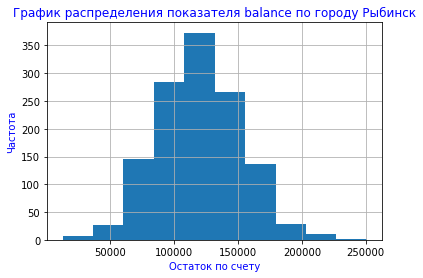

In [13]:
bank_dataset_rb['balance'].hist()
plt.title('График распределения показателя balance по городу Рыбинск', color='blue')
plt.xlabel('Остаток по счету', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

In [14]:
print('Среднее значение balance по городу Рыбинск', round(bank_dataset_rb['balance'].mean(), 2))

Среднее значение balance по городу Рыбинск 119814.99


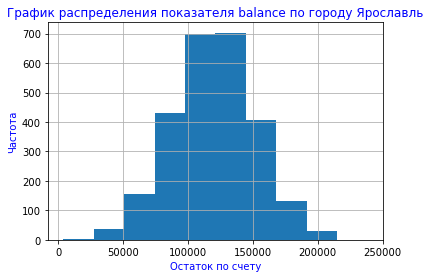

In [15]:
bank_dataset_yr['balance'].hist()
plt.title('График распределения показателя balance по городу Ярославль', color='blue')
plt.xlabel('Остаток по счету', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

In [16]:
print('Среднее значение balance по городу Рыбинск', round(bank_dataset_yr['balance'].mean(), 2))

Среднее значение balance по городу Рыбинск 119927.77


По обоим городам распределение остатка по счету близко к нормальному, поэтому медиана и среднее примерно будут равны, также обе эти статистики довольно хорошо описывают распределение. 

Посмотрим также подробнее информацию по столбцу estimated_salary, содержащему данные о доходе клиента

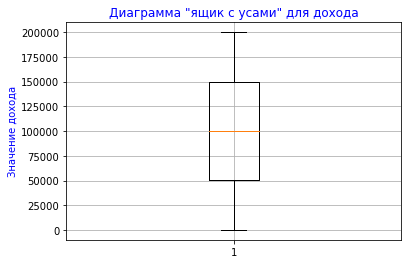

In [17]:
plt.boxplot(bank_dataset['estimated_salary']) 
plt.title('Диаграмма "ящик с усами" для дохода', fontsize=12, color='blue')
plt.ylabel('Значение дохода', fontsize=10, color='blue')
plt.grid()
plt.show()

In [18]:
bank_dataset['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

В таблице содержатся данные по вип-клиентам, поэтому доходы указаны довольно высокие 75% значений выше 150 000, но при этом есть довольно низкие значения, минимум составляет 11,58. Посмотрим сколько значений меньше 10000

In [19]:
len(bank_dataset.query('estimated_salary <= 1000'))#<срез по условию и подсчет количества записей>

59

Верояно не все клиенты указывали свой доход, и поэтому данные были подтянуты из каки-то других систем, у 59 клиентов (0,59% нашей выборки), указан доход ниже 1000 рублей, удалим эти данные, чтобы они не искажали дальнешее исследование, также произведем замену пропусков в столбце balance на средние размеры остатков в разрезе города

In [20]:
dataset_filt = bank_dataset.query('estimated_salary > 1000')

In [21]:
dataset_filt['balance'] = dataset_filt['balance'].fillna(dataset_filt.groupby('сity')['balance'].transform('mean')) #замена пропусков в разрезе группы
dataset_filt.isnull().sum() #проверяем, что пропущенных значений в столбце balance больше нет

<ipython-input-21-55cebf074347>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



user_id             0
score               0
сity                0
gender              0
age                 0
objects             0
balance             0
products            0
credit_card         0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

Данные по клиентам с доходом свыше 150 000 править не будем, по вип-клиентам вполне могут быть очень высокие доходы.

# Вывод

В процессе преобработки были откорректированы названия столбцов и проанализированы пропуски в столбце balance. Пропущенные значения присутсвуют только по городам Рыбинск и Ярославль. Данные в столбце balance по этим городам распределены нормально, среднее значение хорошо описывает такие распределения, было принято решение заменить пропуски на средние значения в разрезе городов. Также, посмотрев минимальные и максимальные данные, и диаграмму "ящик с усами" по этой переменной, выявили по некотоым клиентам экстремально низкие значения дохода, для того чтобы они не искажали дальнеший анализ, значения менее 1000 рублей, в количестве 59 штук, исключили из таблицы, они имеют маленькую долю в общем количестве записей (0,59%).

## 3. Исследовательский анализ данных<a id="research_analysis"> </a>

### 3.1 Анализ распределения признаков

In [22]:
dataset_filt.head()

,user_id,score,сity,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,119912.709299,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.860000,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.800000,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,119912.709299,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.820000,1,1,1,79084.10,0


Выделим следующие группы признаков:
    1. Бинарные (gender, credit_card, loyalty, churn)
    2. Категориальные (сity)
    3. Количественные (score, age, objects, balance, products, estimated_salary)

Посмотрим на гистограмму распределения клиентов по возрасту 

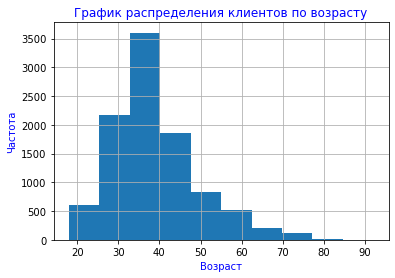

In [23]:
dataset_filt['age'].hist()
plt.title('График распределения клиентов по возрасту', color='blue')
plt.xlabel('Возраст', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

Разделим клиентов на несколько возрастных групп, и проставим пометки о возрасте, чтобы в дальнейшем учитывать это в формировании портрета клиента

In [24]:
dataset_age = dataset_filt.pivot_table(index= 'age', values='user_id', aggfunc='count') \
                    .rename(columns={'user_id':'count_user'}) \
                    .sort_values(by='age') \
                    .reset_index()

In [25]:
dataset_age.head(20)

,age,count_user
0,18,22
1,19,27
2,20,40
3,21,53
4,22,83
5,23,99
6,24,132
7,25,154
8,26,198
9,27,209


На основе гистограммы и сводной таблицы, выделим следующие категории клиентов по возрасту: 
    - 18-30 лет "Молодые"
    - 31-46 лет "Средний возраст"
    - 47-62 лет "Предпенсионный"
    - 63-92 лет "Пенсионный"
Проставим в датасете отметки по каждому клиенту к какой категории возраста он относится, для этого напишем функцию

In [26]:
def age_category(dataset_filt):
    if 18<= dataset_filt.age <= 30:
        return 'молодые'
    elif 31<= dataset_filt.age <= 46:
        return 'средний возраст'
    elif 47<= dataset_filt.age <= 62:
        return 'предпенсионный'
    else:
        return 'пенсионный'
dataset_filt['age_category'] = dataset_filt.apply(age_category, axis=1) 

<ipython-input-26-193cc8bf5a7b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Посмотрим сначала на общую долю оттока:

In [27]:
dataset_coun_churn = dataset_filt['churn'].value_counts()
count_hurn_0 = dataset_coun_churn[0]#количество оставшихся клиентов
count_hurn_1 = dataset_coun_churn[1]#количество клиентов в оттоке

In [28]:
dataset_coun_churn

0    7917
1    2024
Name: churn, dtype: int64

В отток ушло 2024 клиента, довольно много, учитывая, что это составляет 20% от общего количества клиентов

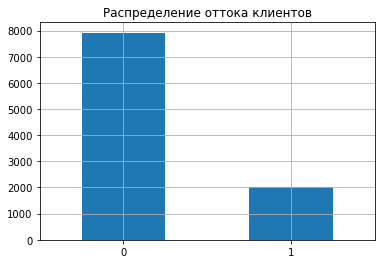

In [29]:
g=dataset_filt['churn'].value_counts().plot(kind='bar', label='сhurn')
plt.xticks(rotation = 0)
plt.grid()
plt.title('Распределение оттока клиентов');
plt.show()

Посмотрим как распределены доли возрастных групп в разрезе групп клинов (оставшихся и в оттоке):

In [30]:
dataset_age_category = dataset_filt.pivot_table(index = 'age_category', columns = 'churn', values = 'user_id', aggfunc='count') \
                    .rename(columns={'user_id':'count_user', 0:'churn_0', 1:'churn_1'}) \
                    .reset_index()#<сводная таблица>

dataset_age_category['ratio_churn_0'] = round((dataset_age_category['churn_0'] / count_hurn_0 *100), 2)#<доли разных возрастных групп среди оставшихся клиентов >
dataset_age_category['ratio_churn_1'] = round((dataset_age_category['churn_1'] / count_hurn_1 *100), 2)#<доли разных возрастных групп среди клиентов в оттоке>
dataset_age_category

churn,age_category,churn_0,churn_1,ratio_churn_0,ratio_churn_1
0,молодые,1812,148,22.89,7.31
1,пенсионный,283,73,3.57,3.61
2,предпенсионный,728,788,9.20,38.93
3,средний возраст,5094,1015,64.34,50.15


Посмотрим на расределение доле на графике:

In [31]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=dataset_age_category.age_category,
    y=dataset_age_category.ratio_churn_0,
    name='Оставшиеся клиенты',
    marker_color='#454e3c'    
))
fig.add_trace(go.Bar(
    x=dataset_age_category.age_category,
    y=dataset_age_category.ratio_churn_1,
    name='Отток',
    marker_color='#8a9d79'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Распределение долей клиентов по возрастным группам', xaxis_title='Возрастная группа',
                 yaxis_title='Доля возрастной группы', hovermode="x")
fig.show()

Для людей младшей возрастной группы от 18 до 30 в общем количесве ушедших клиентов довольно мала 7,31, т.е. они мало склонны к оттоку, а вот люди в категории, которую мы назвали предпенсионной от 47 до 62 очень склонны к оттоку, в общем количестве их 38,92%, при этом это активно работающие люди, вероятно имеющие хороший доход. Стоит обратить внимание на данную категорию.

Посмотрим на среднее значение по всем показателям в разрезе наличия/отсуствия оттока

In [32]:
сhurn_group = dataset_filt.groupby('churn').mean().reset_index()
сhurn_group

,churn,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,1.573391e+07,651.816597,37.396868,5.031957,119676.201745,1.544272,0.706960,0.553871,100314.505320
1,1,1.573287e+07,645.363636,44.840415,4.922925,120515.677507,1.476779,0.700099,0.360672,102114.193345


Видим что в данных группах по некоторым показателям среднее отличается, к примеру в группе клиентов, которые остались и не ушли в отток, больше скоринговый рейтинг, больше показатель лояльности и количесто используемых продуктов. 

Рассмотрим показатели подробнее на графиках распределения, для этих двух групп клиентов по количественным признакам. Сформируем два среза, для тех кто ушел в отток и тех кто остался клиентом.

In [33]:
churn_group_0 = dataset_filt.query('churn == 0')#срез, содержащий клиентов не ушедших в отток
churn_group_1 = dataset_filt.query('churn == 1')#срез, содержащий клиентов ушедших в отток

In [34]:
distplot_col = list(set(['score', 'age', 'objects', 'balance', 'products', 'estimated_salary'])) 

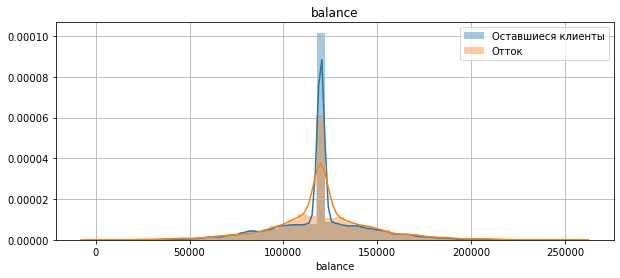

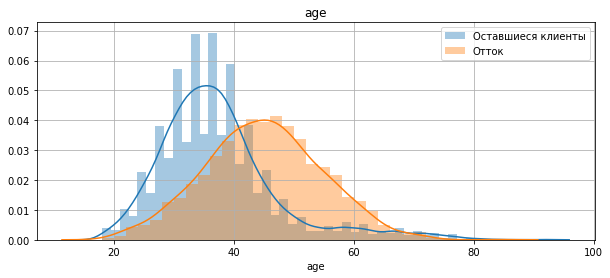

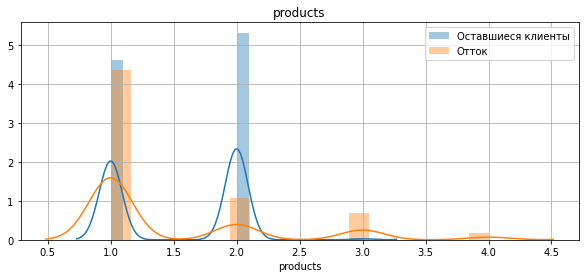

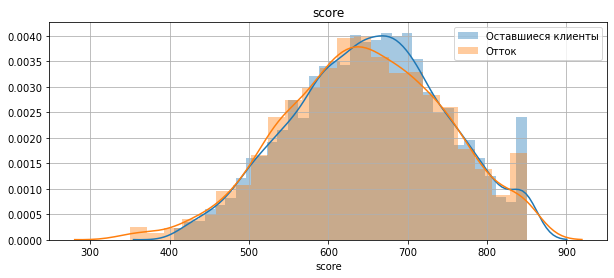

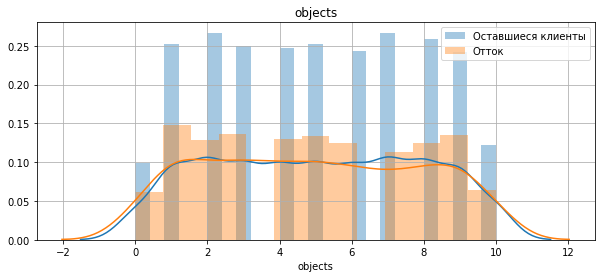

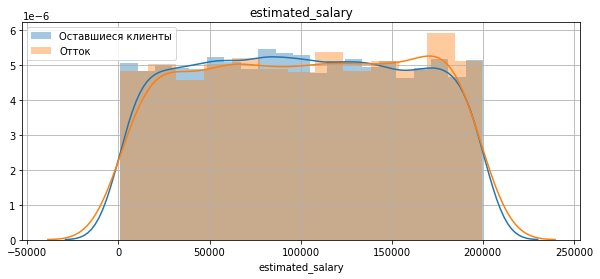

In [35]:
for column in distplot_col: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(churn_group_0[column])
    sns.distplot(churn_group_1[column])
    plt.legend(['Оставшиеся клиенты', 'Отток'])
    plt.grid()
    plt.show()

### 3.2 Определение портрета клиента в оттоке

График распределения скоринга по клиентам, которые не ушли в отток смещен вправо, можно сказать что они обладают более высоким скорингом, чем те, которые уходят

Клиенты в оттоке обычно имеют 1 продукт в банке, а оставшиется клиенты обычно используют 2 продукта. Интересен факт, что клиенты у которых 4 продукта все до одного ушли в отток, их доля в общем количестве невелика, но это наводит на мысль, что могут быть какие-то проблемы управления большим количесвом продуктов в личном кабинете к примеру. 

Распределение количества объектов недвижимости у клиентов  обоих групп примерно одинаково.

А по остатку на счете, клиенты с большими остатками также уходят в отток, клиенты в оттоке имеют остаток чаще всего около 120 000.

По доходу, также в отток больше склонны уходить люди с доходом средним в данной группе около 100 000.

А вот по возрасту хорошо видно смещение в сторону более возрастных людей уходящих в отток - это 40-50 лет, клиенты которые не уходят в отток имеют возраст как правило около 37

Построим столбчатые графики по оставшимся признакам: gender, credit_card, loyalty, churn

По данным признакам можем сказать:
 - доля женщин ушедших в отток больше доли мужчин
 - две трети людей ушедщих в отток имели кредитную карту, и даже это их не удержало
 - две трети людей ушедщих в отток не имели показатель лояльности
 - реже всего в отток уходили люди из Рыбинска и чаще из Ростова
 - чаще всего решение об уходе из банка принимают люди в возрасте от 30 до 45

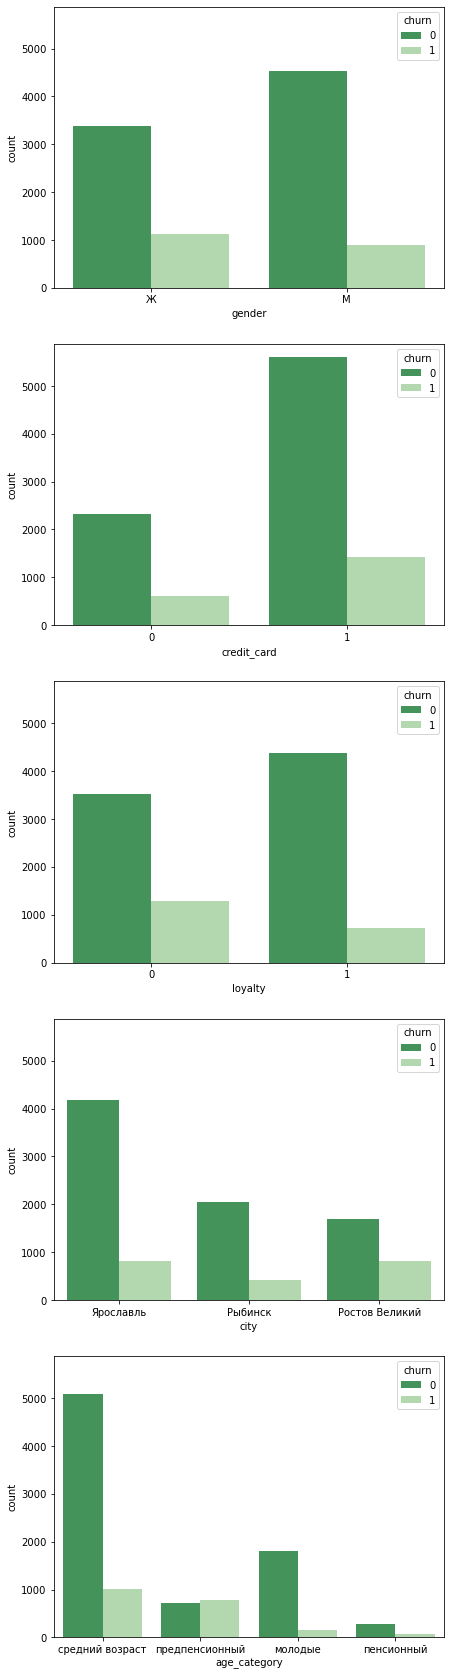

In [36]:
_, axes = plt.subplots(5,1, sharey=True, figsize=(7,30))
sns.countplot(x='gender', hue='churn', data=dataset_filt, ax=axes[0], palette='Greens_r');
sns.countplot(x='credit_card', hue='churn', data=dataset_filt, ax=axes[1], palette='Greens_r');
sns.countplot(x='loyalty', hue='churn', data=dataset_filt, ax=axes[2], palette='Greens_r');
sns.countplot(x='сity', hue='churn', data=dataset_filt, ax=axes[3], palette='Greens_r');
sns.countplot(x='age_category', hue='churn', data=dataset_filt, ax=axes[4], palette='Greens_r');

   

# Вывод

Выделим портрет клиента который ушел в отток:
    - клиент в возрасте от 40 до 60 лет, чаще женщина
    - проживающий в Ростове либо Ярославле
    - не лояльный к банку
    - имеющий 1 продукт и чаще всего это кредитная карта
    - клиент имеет высокий скоринговый рейтинг, больше 620
    - баланс счета за последний месяц около 120000
    - доход около 100000
    
Есть также категория клиентов, которые не ушли в отток, но склонны к этому, и стоит на них обратить внимание, это:
    - клиенты со скоринговым рейтингом выше 600
    - имеющие 1 продукта
    - со средним за последний месяц балансом от 110000 до 130000
    - в возрасте от 30 до 40 лет
    - не лояльные к банку и проживающие в городах Ростов Великий и Ярославль
    

## 4. Проверка гипотез <a id="hipotesys"> </a>

### 4.1 Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Посмотрим среднее, дисперсию, стандартное отклонение для значения дохода по двум выборкам - ушедших и оставшихся клиентов

In [37]:
churn_group_0['estimated_salary'].describe()

count      7917.000000
mean     100314.505320
std       57070.898125
min        1002.390000
25%       51672.080000
50%      100187.430000
75%      148887.690000
max      199992.480000
Name: estimated_salary, dtype: float64

In [38]:
churn_group_1['estimated_salary'].describe()

count      2024.000000
mean     102114.193345
std       57527.964158
min        1112.760000
25%       52786.625000
50%      102808.120000
75%      152548.355000
max      199808.100000
Name: estimated_salary, dtype: float64

In [39]:
variance_salary_0 = np.var(churn_group_0['estimated_salary'])
print('дисперсия дохода оставшихся клиентов ', variance_salary_0)

дисперсия дохода оставшихся клиентов  3256676008.5327616


In [40]:
variance_salary_1 = np.var(churn_group_1['estimated_salary'])
print('дисперсия дохода оставшихся клиентов ', variance_salary_1)

дисперсия дохода оставшихся клиентов  3307831548.1468954


В группе, клиентов, которые остались, сренднее значение дохода 100 314, при этом каждое значение в среднем отклоняется на 57000, довольно большое стандартное отклонение, у клиентов ушедщих в отток значение среднего дохода почти такое же и составляет 102114 рублей, со стандартным отклоненем в 57527. У клиентов в оттоке совсем незначительно больше средний доход, является ли эта разница статистически значимой необходимо проверить.

Сформируем нулевую и альтернативную гипотезы:

    H0 - средние доходы клиентов оставшихся и ушедших в отток равны 
    H1 - средние доходы клиентов оставшихся и ушедших в отток различаются

In [41]:
churn_salary_0 = churn_group_0['estimated_salary']
churn_salary_1 = churn_group_1['estimated_salary']

In [42]:
variance_churn_salary_0 = np.var(churn_salary_0)
print('дисперсия для выборки по оставшимся клиентам', variance_churn_salary_0)

дисперсия для выборки по оставшимся клиентам 3256676008.5327616


In [43]:
variance_churn_salary_1 = np.var(churn_salary_1)
print('дисперсия для выборки по клиентам в оттоке', variance_churn_salary_1)

дисперсия для выборки по клиентам в оттоке 3307831548.1468954


Дисперсии не сильно отличаются, при сильном различии дисперии необходимо использовать параметр equal_var False, при использовании теста Стьюдента

Напишем функцию, которая проверит выборки критерием Шапиро на нормальность распределения, и в зависимости от этого проведет проверку гипотезы тестом Стьюдента при нормальном распределении, либо тестом Манна-Уитни при ненормальмальном распределении:

In [44]:
alpha = 0.05 # критический уровень статистической значимости

In [45]:
alpha = 0.05
def test(arr1, arr2):
    if st.shapiro(arr1)[1] > 0.05 and st.shapiro(arr2)[1] > 0.05:
        results = st.ttest_ind(arr1, arr2)
    else:
        results = st.mannwhitneyu(arr1, arr2)
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        return("Средние показатели клиентов обоих групп не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.")
    else:
        return("Средние показатели клиентов обоих групп равны, так как значение стат значимости больше критического уровня стат  значимости, и мы НЕ смогли опровергнуть нулевую гипотезу.")

In [46]:
test(churn_salary_0, churn_salary_1)

p-значение: 0.1034626302465117


C:\Users\Urka\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



'Средние показатели клиентов обоих групп равны, так как значение стат значимости больше критического уровня стат  значимости, и мы НЕ смогли опровергнуть нулевую гипотезу.'

Проверка гипотезы показала отсутствие статистически значимой разницы между средними значениями дохода групп оставшихся клиентов и клиентов в оттоке.

### 4.2 Проверка гипотезы различия скорингового рейтинга между теми клиентами, которые ушли и теми, которые остались.

Посмотрим среднее, дисперсию, стандартное отклонение скорингового рейтинга - ушедших и оставшихся клиентов

In [47]:
churn_group_0['score'].describe()

count    7917.000000
mean      651.816597
std        95.618000
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: score, dtype: float64

In [48]:
churn_group_1['score'].describe()

count    2024.000000
mean      645.363636
std       100.340819
min       350.000000
25%       578.000000
50%       646.000000
75%       716.250000
max       850.000000
Name: score, dtype: float64

В группе, клиентов, которые остались, среднее значение скоринга 651,81 при этом каждое значение в среднем отклоняется на 95, у клиентов ушедщих в отток значение скоринга почти такое же и составляет 645, со стандартным отклоненем в 100. Является ли эта разница статистически значимой необходимо проверить. Дисперсии выборок отличаются незначительно, поэтому используем параметр equal_var со значением True

Сформируем нулевую и альтернативную гипотезы:

    H0 - средний скоринговый рейтинг клиентов оставшихся и ушедших в отток равны 
    H1 - средний скоринговый рейтинг клиентов оставшихся и ушедших в отток различаются

In [49]:
churn_score_0 = churn_group_0['score']
churn_score_1 = churn_group_1['score']

Проверим сильно ли различаются дисперсии выборок

In [50]:
variance_churn_score_0 = np.var(churn_score_0)
print('дисперсия скоринга для выборки по оставшимся клиентам', variance_churn_score_0)

дисперсия скоринга для выборки по оставшимся клиентам 9141.647050540372


In [51]:
variance_churn_score_1 = np.var(churn_score_1)
print('дисперсия скоринга для выборки по ушедшим клиентам', variance_churn_score_1)

дисперсия скоринга для выборки по ушедшим клиентам 10063.3055156306


Дисперсии выборок примерно равны, вызовем функцию для проверки нормальности распределения и проверки гипотезы различия скоринговых рейтингов 

In [52]:
test(churn_score_0, churn_score_1)

p-значение: 0.01065068606077328


'Средние показатели клиентов обоих групп не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.'

Получаем, что отток клиентов зависит от скоринга, клиенты не в оттоке имеют больший средний скоринг и эта разница статистически значима

### 4.3 Проверка гипотезы различия среднего возраста между теми клиентами, которые ушли и теми, которые остались.

Посмотрим среднее, дисперсию, стандартное отклонение возраста - ушедших и оставшихся клиентов

In [53]:
churn_group_0['age'].describe()

count    7917.000000
mean       37.396868
std        10.119218
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: age, dtype: float64

In [54]:
churn_group_1['age'].describe()

count    2024.000000
mean       44.840415
std         9.773598
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64

In [55]:
churn_group_0['age'].median()

36.0

In [56]:
churn_group_1['age'].median()

45.0

В целом средний возраст клиентов в оттоке выше, составляет 44 года со стандартным отклонением 9, в то время как средний возраст людей оставшихся 37 со стандартным отклонением 10. Проверим является ли эта разница статистически значимой

Сформируем нулевую и альтернативную гипотезы:

    H0 - средний возраст клиентов оставшихся и ушедших в отток равны 
    H1 - средний возраст клиентов оставшихся и ушедших в отток различаются

In [57]:
churn_age_0 = churn_group_0['age']
churn_age_1 = churn_group_1['age']

In [58]:
variance_churn_age_0 = np.var(churn_age_0)
print('дисперсия для выборки по оставшимся клиентам', variance_churn_age_0)

дисперсия для выборки по оставшимся клиентам 102.38563121308648


In [59]:
variance_churn_age_1 = np.var(churn_age_1)
print('дисперсия для выборки по оставшимся клиентам', variance_churn_age_1)

дисперсия для выборки по оставшимся клиентам 95.47601484752131


Дисперсии не сильно отличаются

Проверим гипотезу различия возраста:

In [60]:
test(churn_age_0, churn_age_1)

p-значение: 2.1568857374534785e-229


'Средние показатели клиентов обоих групп не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.'

Получаем, что разница среднего возраста клиентов в оттоке и оставшихся клиентов статистически значима, клиенты в оттоке обладаются большим средним возрастом.

Проведем проверку данной гипотезы также критерием Стьюдента, т.к. распределение возраста все же визуально стремится к нормальному на графике. И еще момент, условием для применения U-критерия Манна-Уитни является отсутствие в сравниваемых группах совпадающих значений признака (все числа – разные) или очень малое число таких совпадений, в нашем случае мы анализируем возраст, поэтому имеем много совпадающих значений возраста.

In [61]:
results = st.ttest_ind(
    churn_age_0, 
    churn_age_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Средний возраста клиентов обоих групп не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.")
else:
    print("Средний возраст клиентов обоих групп одинаков, так как значение стат значимости больше критического уровня стат  значимости, и мы НЕ смогли опровергнуть нулевую гипотезу.")

p-значение: 3.14244448846918e-186
Средний возраста клиентов обоих групп не равны, так как значение стат значимости меньше критического уровня стат  значимости, и мы смогли опровергнуть нулевую гипотезу.


Тест Стьюдента, также подтвердил наличие статистически значимой разницы между средними значениями возраста в наших выборках.

# Вывод

Проверка гипотез показала отсутствие статистически значимой разницы между средними значениями дохода групп оставшихся клиентов и клиентов в оттоке. Т.е. мы не можем утверждать, что по показателям дохода клиенты в оттоке отличаются от оставшихся клиентов.

По показателю возраста и скоринга обратная ситуация, по ним есть статистически значимая разница, а этом значит, что скоринг у клиентов в оттоке меньше, а возраст больше чем у оставшихся клиентов.



# Выводы по портрету клиентов и рекомендации <a id="resume"> </a>

    Нам был предоставлен датасет, содержащий инфмормацию о клиентах банка, состоит из 12 столбцов м 10000 строк. В процессе преобработки откорректированы названия столбцов и проанализированы пропуски в столбце balance. Отметим, что пропущенные значения присутсвуют только по городам Рыбинск и Ярославль. Данные в столбце balance по этим городам распределены нормально, среднее значение хорошо описывает такие распределения, было принято решение заменить пропуски на средние значения в разрезе городов. Также, посмотрев минимальные и максимальные данные, и диаграмму "ящик с усами" по этой переменной, выявили по некотоым клиентам экстремально низкие значения дохода, для того чтобы они не искажали дальнеший анализ, значения менее 1000 рублей, в количестве 59 штук, исключили из таблицы, они имеют маленькую долю в общем количестве записей (0,59%).
    Проверка гипотез показала отсутствие статистически значимой разницы между средними значениями дохода групп оставшихся клиентов и клиентов в оттоке. Т.е. мы не можем утверждать, что по показателям дохода клиенты в оттоке отличаются от оставшихся клиентов. По показателю возраста и скоринга обратная ситуация, по ним есть статистически значимая разница, а это значит, что скоринг у клиентов в оттоке меньше, а возраст больше чем у оставшихся клиентов.
 
   
    Анализ распределений и гипотез, позволил выделить типичный портрет клиента, которые ушел в отток: 

    - средний возраст клиента около 44 лет, чаще женщина
    - проживающий в Ростове Великом и Ярославле
    - нет активности в приложений и на сайте Банка
    - имеющий 1 продукт и чаще всего это кредитная карта
    - клиент имеет высокий скоринговый рейтинг, больше 620
    - баланс счета за последний месяц около 120000

    
    Есть также категория клиентов, которые не ушли в отток, но склонны к этому, и стоит на них обратить внимание, это:
    - клиенты со скоринговым рейтингом выше 600
    - имеющие 1 продукт
    - со средним за последний месяц балансом от 110000 до 130000
    - в возрасте от 47 до 62 лет
    - не лояльные к банку и проживающие в областных городах Ростове Великом и Ярославле
    
    Рекомендации по удержанию клиентов склонных к оттоку:
    - стимуляция увеличения количества используемых клиентом продуктов, делать упор на привлечение новыми кредитными предложениями, к примеру возврат части процентов по кредиту при использовании кредитной карты Банка
    - понятная и приемлемая реклама для людей возрастной категории 40+, проживающих в регионах, не ориентироваться только на молодежную группу
    - повышать активность клиентов в мобильных приложениях, размещать в них интересные статистические факты о том на какие услуги были потраченых суммы, статьи о возможности инвестирования в акции различных компаний (в связи с нарастанием популярности инвестирования, открытия ИИС для физических лиц) искать возможности использования мобильного банковского приложения для покупки различных небанковских услуг (авиа, ж/д билетов, билетов на развлекательные мероприятия)
    - поскольку у людей остающихся клиентами большее значение баланса счета, рассмотреть более гибкую политику начисления процентов на остаток при достижении определенных сумм баланса
    - обратить внимание на обслуживание клиентов в представительствах Банка в городах Ростов Великий и Ярославль, возможно необходимо провести инструктаж или обучение сотрудников.
    - оценить удобство управления продуктами через личный кабинет, когда их более 3-х
    

## Ссылка на презентацию

https://yadi.sk/i/zIw0kKJYhyH9Rw

## Ссылка на дашборд

https://public.tableau.com/profile/marina3356#!/vizhome/Banki_project/Dashboard2?publish=yes